In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv', sep=',')
print(df.head(5), "\n")
print(df.info(), "\n")
print(df.shape, "\n")
print(df.dtypes, "\n")

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  

In [4]:
# отбор числовых колонок (Числовые признаки)
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [5]:
# отбор нечисловых колонок (Категориальные признаки)
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]


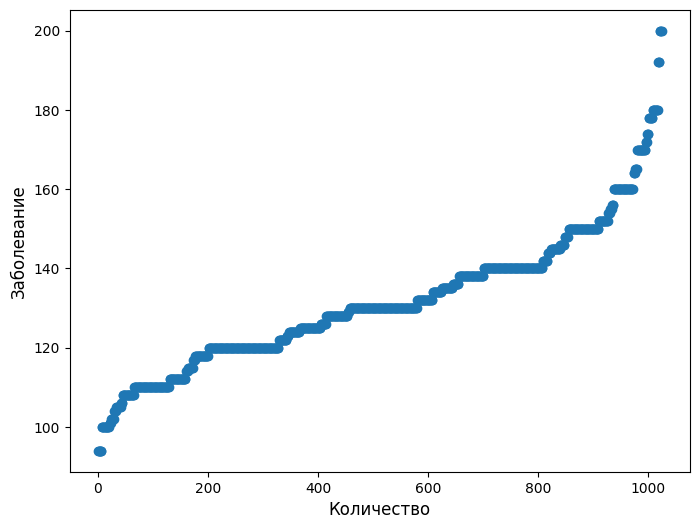

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.trestbps.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Заболевание', fontsize=12)
plt.show()

In [7]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

In [8]:
# смотрим количество пропусков по каждой переменной
print(df.shape[0])
df.isnull().sum()*100/df.shape[0]

1025


age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [9]:
# или так
for col in df.columns:
 pct_missing = np.mean(df[col].isnull())
 k=round(pct_missing*100)
 print('{} - {}%'.format(col, k))

age - 0%
sex - 0%
cp - 0%
trestbps - 0%
chol - 0%
fbs - 0%
restecg - 0%
thalach - 0%
exang - 0%
oldpeak - 0%
slope - 0%
ca - 0%
thal - 0%
target - 0%


In [10]:
# Метод удаления по списку

# отбрасываем строки с большим количеством пропусков
df_del= df.dropna()
print(df_del.describe())
df_del

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [11]:
# Отбрасывание признаков

cols_to_drop = ['thalach']
df_less_Insulin = df.drop(cols_to_drop, axis=1)
df_less_Insulin

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,0,0.0,2,0,2,1


In [12]:
# Внесение недостающих значений

med = df['thalach'].median()
print(med)
df_med = df
df_med['thalach'] = df_med['thalach'].fillna(med)
df_med

152.0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [13]:
# Одномерное восстановление признаков

from sklearn.impute import SimpleImputer

# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
imputer = imputer.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)
df_new1.round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


In [14]:
# Многомерное восстановление признаков

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
imp = imp.fit(df_numeric)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df_numeric.loc[:,:]), columns = df_numeric.columns)
df_new1.round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0.0,125.0,212.0,0.0,1.0,168.0,0.0,1.0,2.0,2.0,3.0,0.0
1,53.0,1.0,0.0,140.0,203.0,1.0,0.0,155.0,1.0,3.1,0.0,0.0,3.0,0.0
2,70.0,1.0,0.0,145.0,174.0,0.0,1.0,125.0,1.0,2.6,0.0,0.0,3.0,0.0
3,61.0,1.0,0.0,148.0,203.0,0.0,1.0,161.0,0.0,0.0,2.0,1.0,3.0,0.0
4,62.0,0.0,0.0,138.0,294.0,1.0,1.0,106.0,0.0,1.9,1.0,3.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1.0,140.0,221.0,0.0,1.0,164.0,1.0,0.0,2.0,0.0,2.0,1.0
1021,60.0,1.0,0.0,125.0,258.0,0.0,0.0,141.0,1.0,2.8,1.0,1.0,3.0,0.0
1022,47.0,1.0,0.0,110.0,275.0,0.0,0.0,118.0,1.0,1.0,1.0,1.0,2.0,0.0
1023,50.0,0.0,0.0,110.0,254.0,0.0,0.0,159.0,0.0,0.0,2.0,0.0,2.0,1.0


<Axes: >

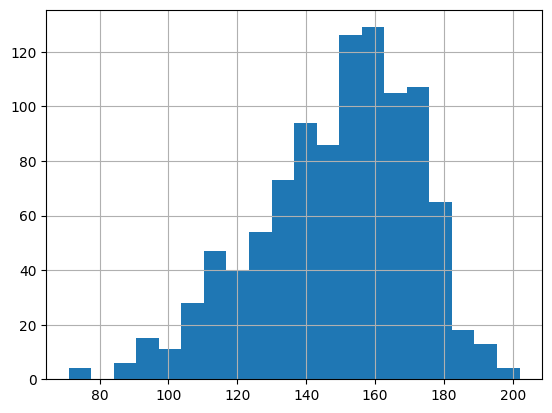

In [15]:
# Нетипичные данные (выбросы)

# Гистограмма/коробчатая диаграмма

df_new1['thalach'].hist(bins=20)

<Axes: >

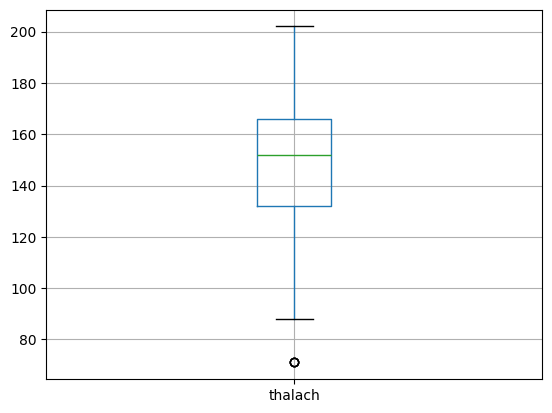

In [16]:
# Коробчатая диаграмма

df_new1.boxplot(column=['thalach'])

In [17]:
# Описательная статистика

df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

In [18]:
# df_new_del = df_new1.drop(np.where(df_new1['thalach'] >= 33)[0])
# df_new_del['thalach'].describe()
# df_new_del.boxplot(column=['thalach'])

In [19]:
# Удаление мусора

# Неинформативные признаки

num_rows = len(df_numeric.index)
low_information_cols = []
for col in df_numeric.columns:
    cnts = df_numeric[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

6.634146341463415
69.5609756097561
48.48780487804878
12.487804878048781
2.048780487804878
85.07317073170732
50.048780487804876
3.414634146341464
66.34146341463415
32.09756097560976
47.02439024390244
56.39024390243902
53.07317073170732
51.31707317073171


In [28]:
# Нерелевантные признаки

# Дубликаты записей

# отбрасываем неуникальные строки
df_dedupped = df.drop_duplicates()
# сравниваем формы старого и нового наборов
print(df.shape)
print(df_dedupped.shape)
df_dedupped

(1025, 14)
(302, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [21]:
key = ['sex', 'age', 'exang','thalach']
df.fillna(0).groupby(key)
df_dedupped2 = df.drop_duplicates(subset=key)
print(df.shape)
print(df_dedupped2.shape)
df_dedupped2

(1025, 14)
(299, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [22]:
# Работа с текстовыми данными и их обработка

data_train = pd.read_csv('heart.csv', sep=',')
data_test = pd.read_csv('heart.csv', sep=',')
print(data_train)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0

In [23]:
# отбор числовых колонок
df_numeric = data_train.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']


In [24]:
# отбор нечисловых колонок
df_non_numeric = data_train.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

[]


In [25]:
# Опечатки

print(data_train['sex'].unique())
print(data_train['restecg'].unique())
print(data_train['slope'].unique())
print(data_train['thal'].unique())

[1 0]
[1 0 2]
[2 0 1]
[3 2 1 0]


In [26]:
data_train = data_train.drop(['sex','restecg', 'slope', 'thal'],axis=1)
data_train

,age,cp,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target
0,52,0,125,212,0,168,0,1.0,2,0
1,53,0,140,203,1,155,1,3.1,0,0
2,70,0,145,174,0,125,1,2.6,0,0
3,61,0,148,203,0,161,0,0.0,1,0
4,62,0,138,294,1,106,0,1.9,3,0
...,...,...,...,...,...,...,...,...,...,...
1020,59,1,140,221,0,164,1,0.0,0,1
1021,60,0,125,258,0,141,1,2.8,1,0
1022,47,0,110,275,0,118,1,1.0,1,0
1023,50,0,110,254,0,159,0,0.0,0,1


In [27]:
# Обработка редких категорий
# создаем список категориальных переменных
cat_cols = data_test.dtypes[data_test.dtypes == 'object'].index.tolist()
# смотрим частоты по категориальным переменным
for col in cat_cols:
 print(data_test[col].name)
 print(data_test[col].value_counts(dropna=False))
 print('')
